In [1]:
import numpy as np
import h5py
from lr_utils import load_dataset
import matplotlib.pyplot as plt
##import scipy
##from PIL import Image
##from scipy import ndimage
import skimage

In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes=load_dataset()
train_set_x_orig.shape[1]

64

The image with y = 0 ,its a b'non-cat'


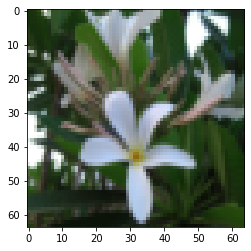

In [3]:
index=9
plt.imshow(train_set_x_orig[index,:])
print("The image with y = "+str(np.squeeze(train_set_y[:,index]))+" ,its a "+str(np.squeeze(classes[np.squeeze(train_set_y[:,index])])))

In [4]:
num_px=train_set_x_orig.shape[1]

In [5]:
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T


In [6]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [25]:
train_set_x=train_set_x_flatten/255
test_set_x=test_set_x_flatten/255
train_set_x.shape

(12288, 209)

In [8]:
def sigmoid(Z):
    s=1/(1 + np.exp(-Z))
    return s

In [9]:
def initialize_parameters(dim):
    W=np.zeros(shape=(dim, 1), dtype=np.float32)
    b=0
    
    assert(W.shape==(dim, 1))
    assert(isinstance(b, int) or isinstance(b, float))
   
    parameters={"W":W,
                "b":b
               }
    
    return parameters

In [10]:
def forward_propagation(parameters, X, Y):
    
    W=parameters["W"]
    b=parameters["b"]
    
    ##forward_propagation
    Z=np.dot(W.T, X) + b
    A=sigmoid(Z)
    ##End of forward propagation
    
    
    
    cache={"Z":Z,
           "A":A
          }
    
    return cache

In [11]:
def compute_cost(cache, X, Y):
    m=X.shape[1]
    
    A=cache["A"]
    ##Cost_Function
    cost=(-1/m)*np.sum((Y*np.log(A) + (1-Y)*np.log(1-A)), axis=1)
    cost=np.squeeze(cost)
    ##End of Cost Function
    
    assert(cost.shape==())
    
    return cost

In [12]:
def back_propagation(parameters, cache, X, Y):
    
    m=X.shape[1]
    
    W=parameters["W"]
    A=cache["A"]
    
    ##Back propagation
    dZ=A - Y
    dW=(1/m)*np.dot(X, dZ.T)
    db=(1/m)*np.sum(dZ, axis=1)
    ##End of back propagation
    
    
    assert(dW.shape==W.shape)
    assert(db.dtype==float)
    
    grads={"dW":dW,
           "db":db
          }
    
    return  grads

In [13]:
def optimize(parameters, X, Y, num_iterations, learning_rate, print_cost=False):
    costs=[]
    
    for i in range(num_iterations):
        
        cache=forward_propagation(parameters, X, Y)
        
        cost=compute_cost(cache, X, Y)
        
        grads= back_propagation(parameters, cache, X, Y)
             
        dW=grads["dW"]
        db=grads["db"]
        
        W=parameters["W"]
        b=parameters["b"]
        
        W=W - dW*learning_rate
        b=b - db*learning_rate
        
        if i%100==0:
            
            costs.append(cost) 
        
        if print_cost and i%100==0:
            
            print("Cost after iteration %i: %f"%(i, cost))
            
        parameters={"W":W,
                    "b":b
                   }
    return costs,parameters

In [14]:
def prediction(parameters, X):
    m=X.shape[1]
    Y_prediction=np.zeros((1, m))
    
    W=parameters["W"]
    b=parameters["b"]
    W=W.reshape(X.shape[0], 1)
    
    Z=np.dot(W.T, X)+ b
    A=sigmoid(Z)
    
    [print(x) for x in A]
    for i in range(A.shape[1]):
        
        if A[0, i]>=0.5:
            Y_prediction=1
        
        else:
            Y_prediction=0
            
    return Y_prediction            

In [15]:
def model(X_train, X_test, Y_train, Y_test, num_iterations, learning_rate, print_cost=False):
    parameters=initialize_parameters(X_train.shape[0])
    
    costs,parameters =optimize(parameters, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    Y_prediction_train =prediction(parameters, X_train)
    Y_prediction_test =prediction(parameters, X_test)
    
    print("Train accuracy = {}%".format(100 - np.abs(np.mean(Y_prediction_train - Y_train)*100)))
    print("Test accuracy = {}%".format(100 - np.abs(np.mean(Y_prediction_test - Y_test)*100)))
    
    d={"costs":costs,
       "num_iterations":num_iterations,
       "learning_rate":learning_rate,
       "parameters":parameters,
       "Y_prediction_train":Y_prediction_train,
       "Y_prediction_test":Y_prediction_test
      }
    
    return d

In [21]:
d=model(train_set_x, test_set_x, train_set_y, test_set_y, num_iterations=500, learning_rate=0.001, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.591289
Cost after iteration 200: 0.555796
Cost after iteration 300: 0.528977
Cost after iteration 400: 0.506881
[0.41417929 0.24567378 0.51261336 0.04448347 0.24296022 0.37122695
 0.20782769 0.61036942 0.25382065 0.26354319 0.46614569 0.41521673
 0.4151199  0.45820354 0.26336492 0.24889521 0.21431613 0.13975183
 0.27234995 0.66787338 0.17385207 0.19252124 0.3100396  0.32813976
 0.47076728 0.52757373 0.18936258 0.37676006 0.26428182 0.28446912
 0.26101162 0.35934806 0.55682997 0.39623869 0.16405874 0.41956935
 0.16897267 0.28054734 0.54542321 0.46616812 0.14831621 0.23351961
 0.51942527 0.22795467 0.17021188 0.41978428 0.32900684 0.48311483
 0.06702054 0.3447065  0.41427694 0.41119127 0.2897715  0.48613902
 0.49078435 0.16293547 0.6481256  0.45549882 0.29538173 0.66963542
 0.59664578 0.43143387 0.17152512 0.26244889 0.33223612 0.33797549
 0.35249267 0.29798415 0.37059067 0.22690824 0.32317391 0.69641955
 0.28598448 0.51277688 

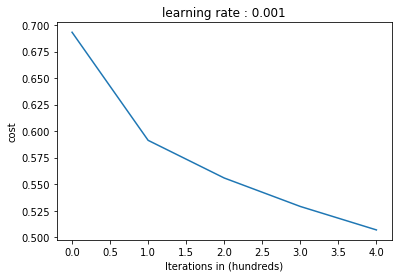

In [22]:
costs=np.squeeze(d["costs"])
plt.plot(costs)
plt.ylabel("cost")
plt.xlabel("Iterations in (hundreds)")
plt.title("learning rate : "+str(d["learning_rate"]))
plt.show()

Learning Rate : 0.01
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.823921
Cost after iteration 200: 0.418944
Cost after iteration 300: 0.617350
Cost after iteration 400: 0.522116
[5.60514619e-01 2.66986000e-01 9.87956276e-01 2.43945646e-04
 1.86261692e-01 3.68889826e-01 8.89061798e-02 9.92670359e-01
 2.77050174e-01 1.56134358e-01 9.25967779e-01 9.76715920e-01
 6.41928109e-01 9.98422720e-01 8.17722301e-01 1.72864433e-01
 1.56053992e-01 2.37704280e-01 3.92452661e-01 9.75857205e-01
 4.70437867e-02 1.22720741e-01 7.29892904e-01 3.06615341e-01
 9.88664451e-01 9.08674891e-01 1.98200601e-01 9.74897730e-01
 3.15183680e-01 9.22749170e-01 2.34958074e-01 2.18956613e-01
 8.79305400e-01 6.95715805e-01 1.92904929e-01 2.52796799e-01
 5.56718456e-02 2.79521386e-01 8.39962957e-01 8.50779980e-01
 4.14416038e-02 2.83638967e-01 9.84244346e-01 2.58762838e-01
 1.78852850e-01 5.83215196e-01 4.21227514e-01 9.34618799e-01
 1.94346808e-02 2.76402326e-01 9.72204792e-01 8.75462037e-01
 4.99622719e-

<function matplotlib.pyplot.show(*args, **kw)>

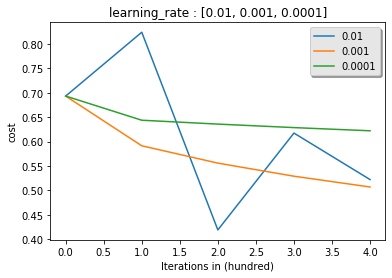

In [28]:
learning_rate=[0.01, 0.001, 0.0001]
models={}

for i in learning_rate:
    print("Learning Rate : "+str(i))
    models[str(i)]=model(train_set_x, test_set_x, train_set_y, test_set_y, num_iterations=500, learning_rate=i, print_cost=True)
    print('\n'+"------------------------------------------------------------------------------------------------------------------"+'\n')
    
for i in learning_rate:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label=str(models[str(i)]["learning_rate"]))
    
plt.title("learning_rate : "+str(learning_rate[:]))
plt.xlabel("Iterations in (hundred)")
plt.ylabel("cost")
plt.legend(loc="upper right", shadow=True).get_frame().set_facecolor('0.90')
# frame=legend.get_frame()
# frame.set_facecolor('0.90')
plt.show

[0.22367799]
y = 0 my algorithm predict that the is a non-cat


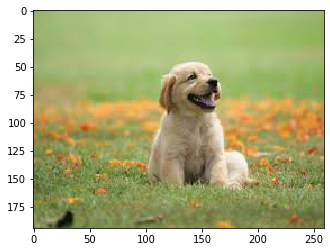

In [30]:
my_image="dog.jpeg"

fname="images/"+my_image

image=np.array(plt.imread(fname))
my_image=skimage.transform.resize(image, output_shape=(num_px, num_px)).reshape(1, num_px*num_px*3).T
my_prediction=prediction(d["parameters"], my_image)

plt.imshow(image)
print("y = "+str(np.squeeze(my_prediction))+" my algorithm predict that the is a "+str(classes[int(np.squeeze(my_prediction))].decode("utf-8")))